🅰️ A. Problem Definition
Objective:
Build models that detect fraudulent credit card transactions based on anonymized features.

Type:

Binary Classification problem (Fraud = 1, Genuine = 0).

Highly Imbalanced → special care needed.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")

🅱️ B. Data Collection
Load Dataset:

Read CSV into a pandas DataFrame.

Inspect Data:

Size of dataset (number of rows, columns).

Check for missing values (although unlikely in this dataset).

# NOTE BOOK WITHOUT HANDLING OUTLIERS

## UNDERSTANDING DATA 

In [6]:
df = pd.read_csv('creditcard.csv')

In [7]:
pd.options.display.max_columns = None

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.436219e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.418678e-16,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.shape

(284807, 31)

In [11]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 284807
Number of Columns 31


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
df.duplicated().any()

np.True_

In [16]:
df = df.drop_duplicates()

In [17]:
df.shape

(283726, 31)

In [18]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [19]:
# Print class distribution
print('No Frauds:', round(df['Class'].value_counts()[0] / len(df) * 100, 2), '%')
print('Frauds:', round(df['Class'].value_counts()[1] / len(df) * 100, 2), '%')

No Frauds: 99.83 %
Frauds: 0.17 %


In [20]:
# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

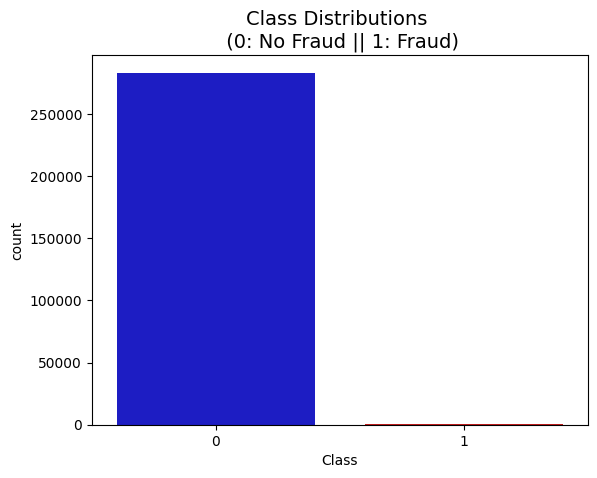

In [21]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


In [22]:
# # ============================================
# #  feature engineering for time
# # ============================================
# df['Hour'] = (df['Time'] / 3600) % 24
# df['Time_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
# df['Time_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
# df.head()

In [23]:
# ============================================
# expected problems and what we have 
# ============================================
# 1- unexpected no missing values
# 2- there are outliers but => we will not handle it because outliers SPECIALY in AMOUNT can help me to specify if it fraud or not
# 3- extrieme imbalance data => we will handle it using smote and calss weight 
# 4- feature engineering for time not drop it => because time can help me to specify if it fraud or not
# 5- scaling for amount column to normalize it => not all feature because it is normalized already before applying PCA

### DATA SPLITING AND HANDLING IMBALANCE

In [24]:
X = df.drop('Class',axis=1)
y = df['Class']
df=X

In [25]:
# ============================================
#  spliting data to train and test to apply smote
# ============================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)


print("Train class distribution:")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True) * 100)

print("\nTest class distribution:")
print(y_test.value_counts())


print(y_test.value_counts(normalize=True) * 100)
print("\nData Split Info:")
print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

Train class distribution:
Class
0    226602
1       378
Name: count, dtype: int64
Class
0    99.833466
1     0.166534
Name: proportion, dtype: float64

Test class distribution:
Class
0    56651
1       95
Name: count, dtype: int64
Class
0    99.832587
1     0.167413
Name: proportion, dtype: float64

Data Split Info:
Training Shape: (226980, 30)
Testing Shape: (56746, 30)


In [26]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
# RobustScaler is less prone to outliers.

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# ============================================
# Scaling 'Amount' and 'Time' AFTER splitting
# ============================================
rob_scaler = RobustScaler()

# Scale Amount
X_train['scaled_amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['scaled_amount']  = rob_scaler.transform(X_test['Amount'].values.reshape(-1,1))

# Scale Time
X_train['scaled_time'] = rob_scaler.fit_transform(X_train['Time'].values.reshape(-1,1))
X_test['scaled_time']  = rob_scaler.transform(X_test['Time'].values.reshape(-1,1))

# Drop original columns
X_train.drop(['Amount','Time'], axis=1, inplace=True)
X_test.drop(['Amount','Time'], axis=1, inplace=True)

# Optional: reorder columns to put scaled_amount and scaled_time first
for df in [X_train, X_test]:
    scaled_amount = df.pop('scaled_amount')
    scaled_time   = df.pop('scaled_time')
    df.insert(0, 'scaled_amount', scaled_amount)
    df.insert(1, 'scaled_time', scaled_time)

# ============================================
# Check shapes and class distribution
# ============================================
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())


Train shape: (226980, 30)
Test shape: (56746, 30)
Train class distribution:
 Class
0    226602
1       378
Name: count, dtype: int64
Test class distribution:
 Class
0    56651
1       95
Name: count, dtype: int64


In [27]:
# ============================================
#  Apply SMOTE ONLY on training data
# ============================================
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ============================================
#  Check class distribution after SMOTE
# ============================================
print("Original training class distribution:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_train_resampled.value_counts())

# Test set remains untouched
print("\nTest set class distribution:")
print(y_test.value_counts())

Original training class distribution:
Class
0    226602
1       378
Name: count, dtype: int64

After SMOTE:
Class
0    226602
1    226602
Name: count, dtype: int64

Test set class distribution:
Class
0    56651
1       95
Name: count, dtype: int64


In [28]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

# Create dictionary
class_weight_dict = dict(zip(classes, class_weights))

print("\n" + "="*60)
print("⚖️ CLASS WEIGHT CALCULATION")
print("="*60)
print(f"\nOriginal class distribution:")
print(y_train.value_counts())
print(f"\nClass proportions:")
print(y_train.value_counts(normalize=True))

print(f"\n✅ Calculated Class Weights:")
print(f"   Class 0 (Legitimate): {class_weight_dict[0]:.4f}")
print(f"   Class 1 (Fraud):      {class_weight_dict[1]:.4f}")
print(f"\n💡 Weight Ratio: {class_weight_dict[1] / class_weight_dict[0]:.2f}x")
print("="*60)


⚖️ CLASS WEIGHT CALCULATION

Original class distribution:
Class
0    226602
1       378
Name: count, dtype: int64

Class proportions:
Class
0    0.998335
1    0.001665
Name: proportion, dtype: float64

✅ Calculated Class Weights:
   Class 0 (Legitimate): 0.5008
   Class 1 (Fraud):      300.2381

💡 Weight Ratio: 599.48x


## Methods ## models

In [29]:
# Store results
bagging_results = {}

In [30]:
start_rf = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]
end_rf = time.time()

In [31]:
# --- Bagged Decision Trees ---
start_bag = time.time()
bag = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=15), n_estimators=70, random_state=42)
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
bag_prob = bag.predict_proba(X_test)[:, 1]
end_bag = time.time()


=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.95      0.75      0.84        95

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC: 0.9402602639057795
Training + Prediction Time: 231.57 seconds


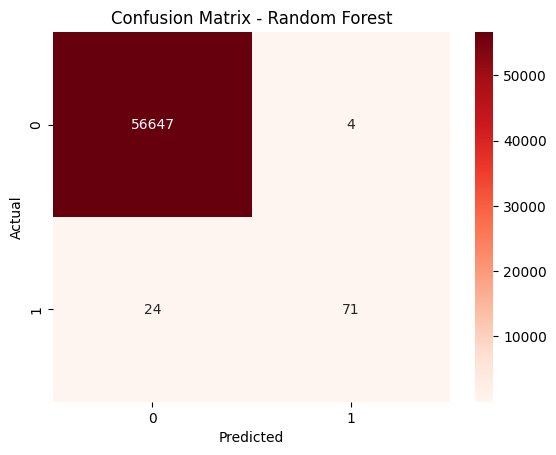

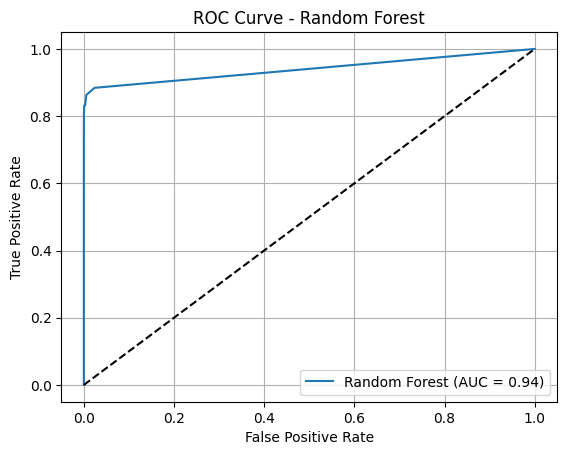


=== Bagged Trees ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.93      0.75      0.83        95

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC: 0.983529161467861
Training + Prediction Time: 788.13 seconds


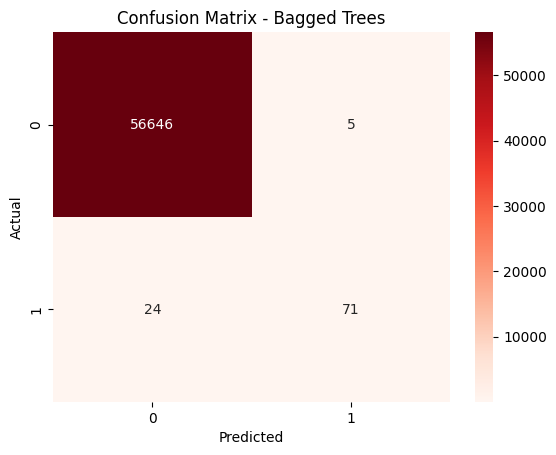

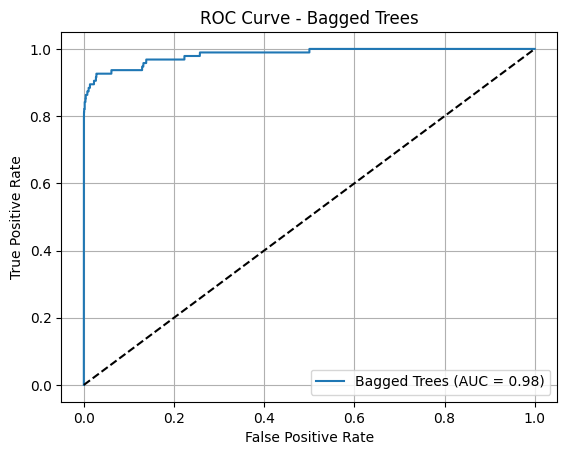

In [32]:
from sklearn.metrics import (
    classification_report, roc_auc_score, accuracy_score,
    precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# --- Evaluate and Display ---
for name, pred, prob, duration in [
    ('Random Forest', rf_pred, rf_prob, end_rf - start_rf),
    ('Bagged Trees', bag_pred, bag_prob, end_bag - start_bag)
]:
    print(f"\n=== {name} ===")
    print(classification_report(y_test, pred))
    print("ROC AUC:", roc_auc_score(y_test, prob))
    print(f"Training + Prediction Time: {duration:.2f} seconds")

    # Save results
    bagging_results[name] = {
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1 Score': f1_score(y_test, pred),
        'ROC AUC': roc_auc_score(y_test, prob),
        'Time (s)': duration
    }

    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Reds')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, prob):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


In [33]:
# Convert results to DataFrame
bagging_df = pd.DataFrame(bagging_results).T
display(bagging_df)

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Time (s)
Random Forest,0.999507,0.946667,0.747368,0.835294,0.940260,231.569998
Bagged Trees,0.999489,0.934211,0.747368,0.830409,0.983529,788.129513


In [34]:
# Store results in a dictionary
bagging_results = {
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, rf_pred),
        'Precision': precision_score(y_test, rf_pred),
        'Recall': recall_score(y_test, rf_pred),
        'F1 Score': f1_score(y_test, rf_pred),
        'ROC AUC': roc_auc_score(y_test, rf_prob),
        'Time (s)': start_rf
    },
    'Bagging': {
        'Accuracy': accuracy_score(y_test, bag_pred),
        'Precision': precision_score(y_test, bag_pred),
        'Recall': recall_score(y_test, bag_pred),
        'F1 Score': f1_score(y_test, bag_pred),
        'ROC AUC': roc_auc_score(y_test, bag_prob),
        'Time (s)': start_bag
    }
}

In [35]:
# Dictionary to store performance
boosting_results = {}

print("\nAll of these models are Boosting-based Ensemble Methods:\n"
      "- AdaBoost\n- Gradient Boosting\n- XGBoost\n")



All of these models are Boosting-based Ensemble Methods:
- AdaBoost
- Gradient Boosting
- XGBoost



In [36]:
# --- AdaBoost ---
start_ada=time.time()
ada = AdaBoostClassifier(n_estimators=90, random_state=42)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_prob = ada.predict_proba(X_test)[:, 1]
end_ada =time.time()

In [37]:
# --- Gradient Boosting ---
start_gb = time.time()
gb = GradientBoostingClassifier(n_estimators=90, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_prob = gb.predict_proba(X_test)[:, 1]
end_gb = time.time()

In [38]:

# --- XGBoost ---
start_xgb = time.time()
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=90, random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
xgb_prob = xgb_clf.predict_proba(X_test)[:, 1]
end_xgb = time.time()


=== AdaBoost ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.73      0.71      0.72        95

    accuracy                           1.00     56746
   macro avg       0.86      0.85      0.86     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC: 0.9800625064452804
Training + Prediction Time: 116.74 seconds


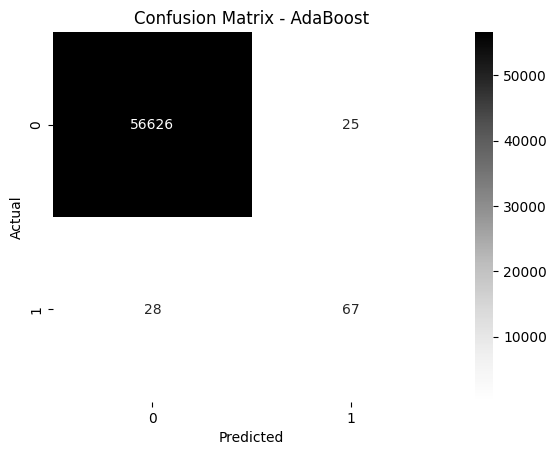

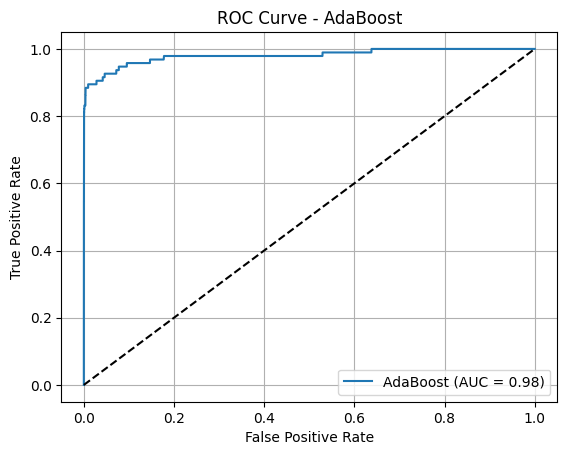


=== Gradient Boosting ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.72      0.68      0.70        95

    accuracy                           1.00     56746
   macro avg       0.86      0.84      0.85     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC: 0.778842385836084
Training + Prediction Time: 311.62 seconds


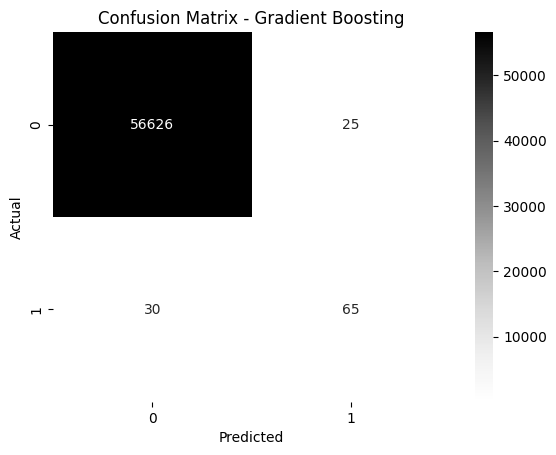

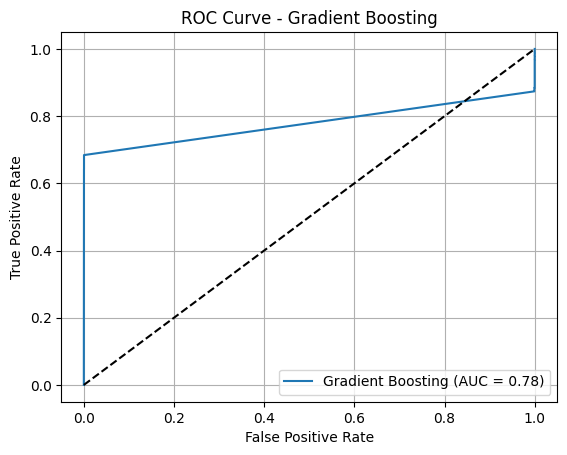


=== XGBoost ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.95      0.75      0.84        95

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC: 0.9714280139989167
Training + Prediction Time: 3.67 seconds


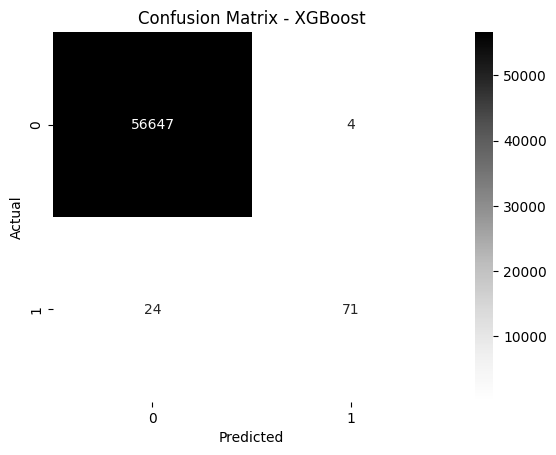

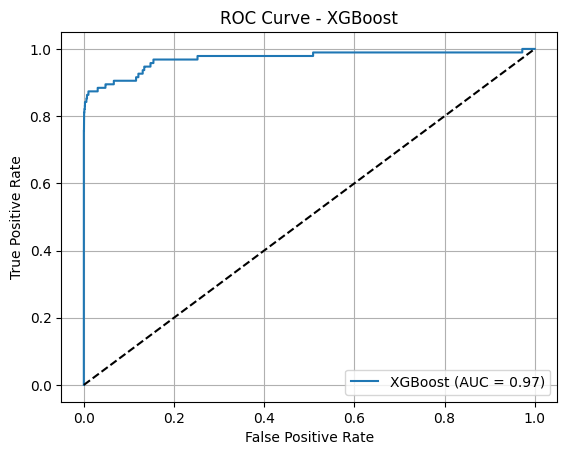

In [39]:
from sklearn.metrics import (
    classification_report, roc_auc_score, accuracy_score,
    precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# --- Evaluate Boosting Models ---
for name, pred, prob, duration in [
    ('AdaBoost', ada_pred, ada_prob, end_ada - start_ada),
    ('Gradient Boosting', gb_pred, gb_prob, end_gb - start_gb),
    ('XGBoost', xgb_pred, xgb_prob, end_xgb - start_xgb)
]:
    print(f"\n=== {name} ===")
    print(classification_report(y_test, pred))
    print("ROC AUC:", roc_auc_score(y_test, prob))
    print(f"Training + Prediction Time: {duration:.2f} seconds")

    # Save metrics
    boosting_results[name] = {
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1 Score': f1_score(y_test, pred),
        'ROC AUC': roc_auc_score(y_test, prob),
        'Time (s)': duration
    }

    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Greys')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, prob):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


In [40]:
# --- Summary Table ---
boosting_df = pd.DataFrame(boosting_results).T
display(boosting_df)

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Time (s)
AdaBoost,0.999066,0.728261,0.705263,0.716578,0.980063,116.736459
Gradient Boosting,0.999031,0.722222,0.684211,0.702703,0.778842,311.619176
XGBoost,0.999507,0.946667,0.747368,0.835294,0.971428,3.668445


In [41]:
# --- Timing Start ---
start_stack = time.time()

# --- Define and Train Stacking Model ---
stack = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=400)),
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier(n_estimators=45))
    ],
    final_estimator=LogisticRegression()
)
stack.fit(X_train, y_train)

,estimators,"[('lr', ...), ('dt', ...), ...]"
,final_estimator,LogisticRegression()
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [42]:
# --- Predict ---
stack_pred = stack.predict(X_test)
stack_prob = stack.predict_proba(X_test)[:, 1]

# --- Timing End ---
end_stack = time.time()
stack_time = end_stack - start_stack

# --- Evaluation ---
print("\n=== Stacking Method ===")
print(classification_report(y_test, stack_pred))
print("ROC AUC:", roc_auc_score(y_test, stack_prob))
print(f"Training + Prediction Time: {stack_time:.2f} seconds")


=== Stacking Method ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.68      0.80        95

    accuracy                           1.00     56746
   macro avg       0.98      0.84      0.90     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC: 0.9845439621542426
Training + Prediction Time: 532.11 seconds


In [43]:
# --- Optional: Store metrics (for final comparison) ---
stacking_results = {
    'Accuracy': accuracy_score(y_test, stack_pred),
    'Precision': precision_score(y_test, stack_pred),
    'Recall': recall_score(y_test, stack_pred),
    'F1 Score': f1_score(y_test, stack_pred),
    'ROC AUC': roc_auc_score(y_test, stack_prob),
    'Time (s)': stack_time
}

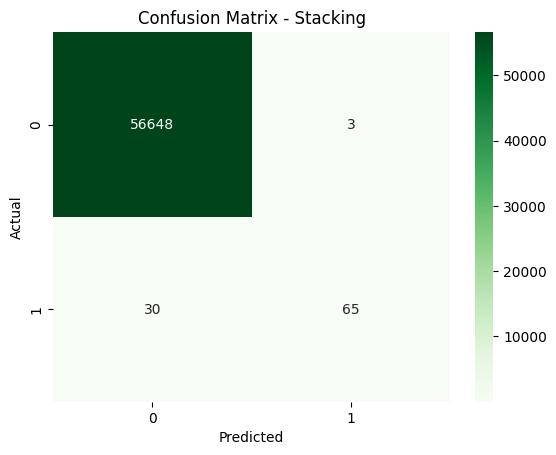

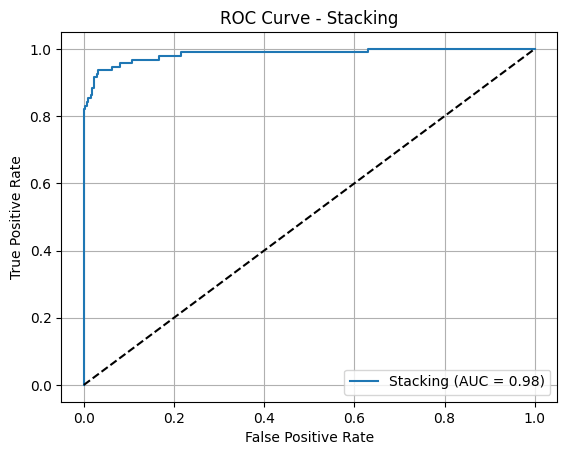

In [44]:

# --- Confusion Matrix ---
sns.heatmap(confusion_matrix(y_test, stack_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Stacking")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, stack_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'Stacking (AUC = {roc_auc_score(y_test, stack_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine results from each group
all_results = {
    'Random Forest': bagging_results['Random Forest'],
    'Bagging': bagging_results['Bagging'],
    'AdaBoost': boosting_results['AdaBoost'],
    'Gradient Boosting': boosting_results['Gradient Boosting'],
    'XGBoost': boosting_results['XGBoost'],
    'Stacking': stacking_results
}
# Create DataFrame for comparison
comparison_df = pd.DataFrame(all_results).T
comparison_df = comparison_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Time (s)']] 

In [46]:
# Convert to DataFrame and reset index while keeping model names
results_df = comparison_df.reset_index().rename(columns={'index': 'Model'})
results_df = results_df.sort_values(by='ROC AUC', ascending=False).reset_index(drop=True)
results_df = results_df.round(4)

In [47]:

# Print with model names
print(results_df)

               Model  Accuracy  Precision  Recall  F1 Score  ROC AUC  \
0           Stacking    0.9994     0.9559  0.6842    0.7975   0.9845   
1            Bagging    0.9995     0.9342  0.7474    0.8304   0.9835   
2           AdaBoost    0.9991     0.7283  0.7053    0.7166   0.9801   
3            XGBoost    0.9995     0.9467  0.7474    0.8353   0.9714   
4      Random Forest    0.9995     0.9467  0.7474    0.8353   0.9403   
5  Gradient Boosting    0.9990     0.7222  0.6842    0.7027   0.7788   

       Time (s)  
0  5.321109e+02  
1  1.764523e+09  
2  1.167365e+02  
3  3.668400e+00  
4  1.764523e+09  
5  3.116192e+02  


In [48]:
# Convert time from seconds to minutes
comparison_df['Time (min)'] = comparison_df['Time (s)'] / (60)

In [49]:
print(comparison_df)

                   Accuracy  Precision    Recall  F1 Score   ROC AUC  \
Random Forest      0.999507   0.946667  0.747368  0.835294  0.940260   
Bagging            0.999489   0.934211  0.747368  0.830409  0.983529   
AdaBoost           0.999066   0.728261  0.705263  0.716578  0.980063   
Gradient Boosting  0.999031   0.722222  0.684211  0.702703  0.778842   
XGBoost            0.999507   0.946667  0.747368  0.835294  0.971428   
Stacking           0.999418   0.955882  0.684211  0.797546  0.984544   

                       Time (s)    Time (min)  
Random Forest      1.764523e+09  2.940871e+07  
Bagging            1.764523e+09  2.940872e+07  
AdaBoost           1.167365e+02  1.945608e+00  
Gradient Boosting  3.116192e+02  5.193653e+00  
XGBoost            3.668445e+00  6.114075e-02  
Stacking           5.321109e+02  8.868515e+00  


Ensemble Method Comparison Table:


<Figure size 1200x700 with 0 Axes>

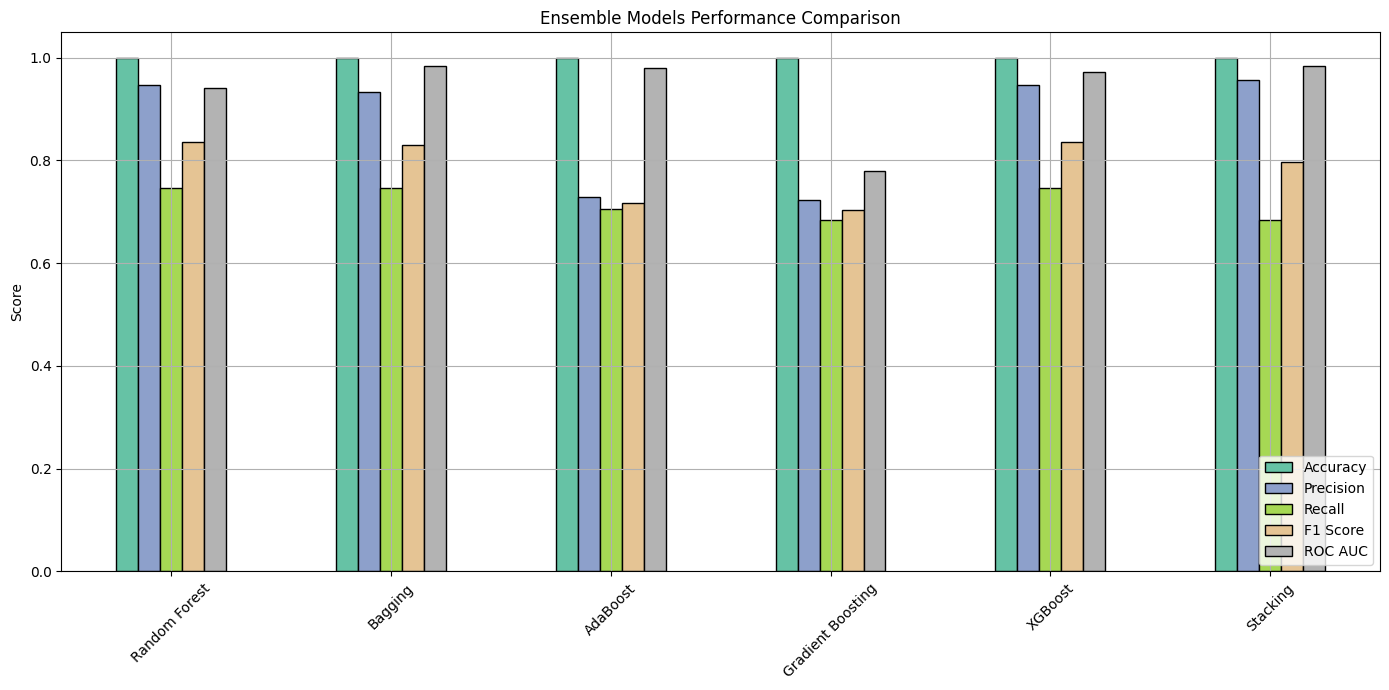

In [50]:
# Display metrics table
print("Ensemble Method Comparison Table:")
# --- Plotting Bar Charts ---
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# 1. Metric Comparison Plot
plt.figure(figsize=(12, 7))
comparison_df[metrics_to_plot].plot(kind='bar', figsize=(14, 7), colormap='Set2', edgecolor='black')
plt.title("Ensemble Models Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

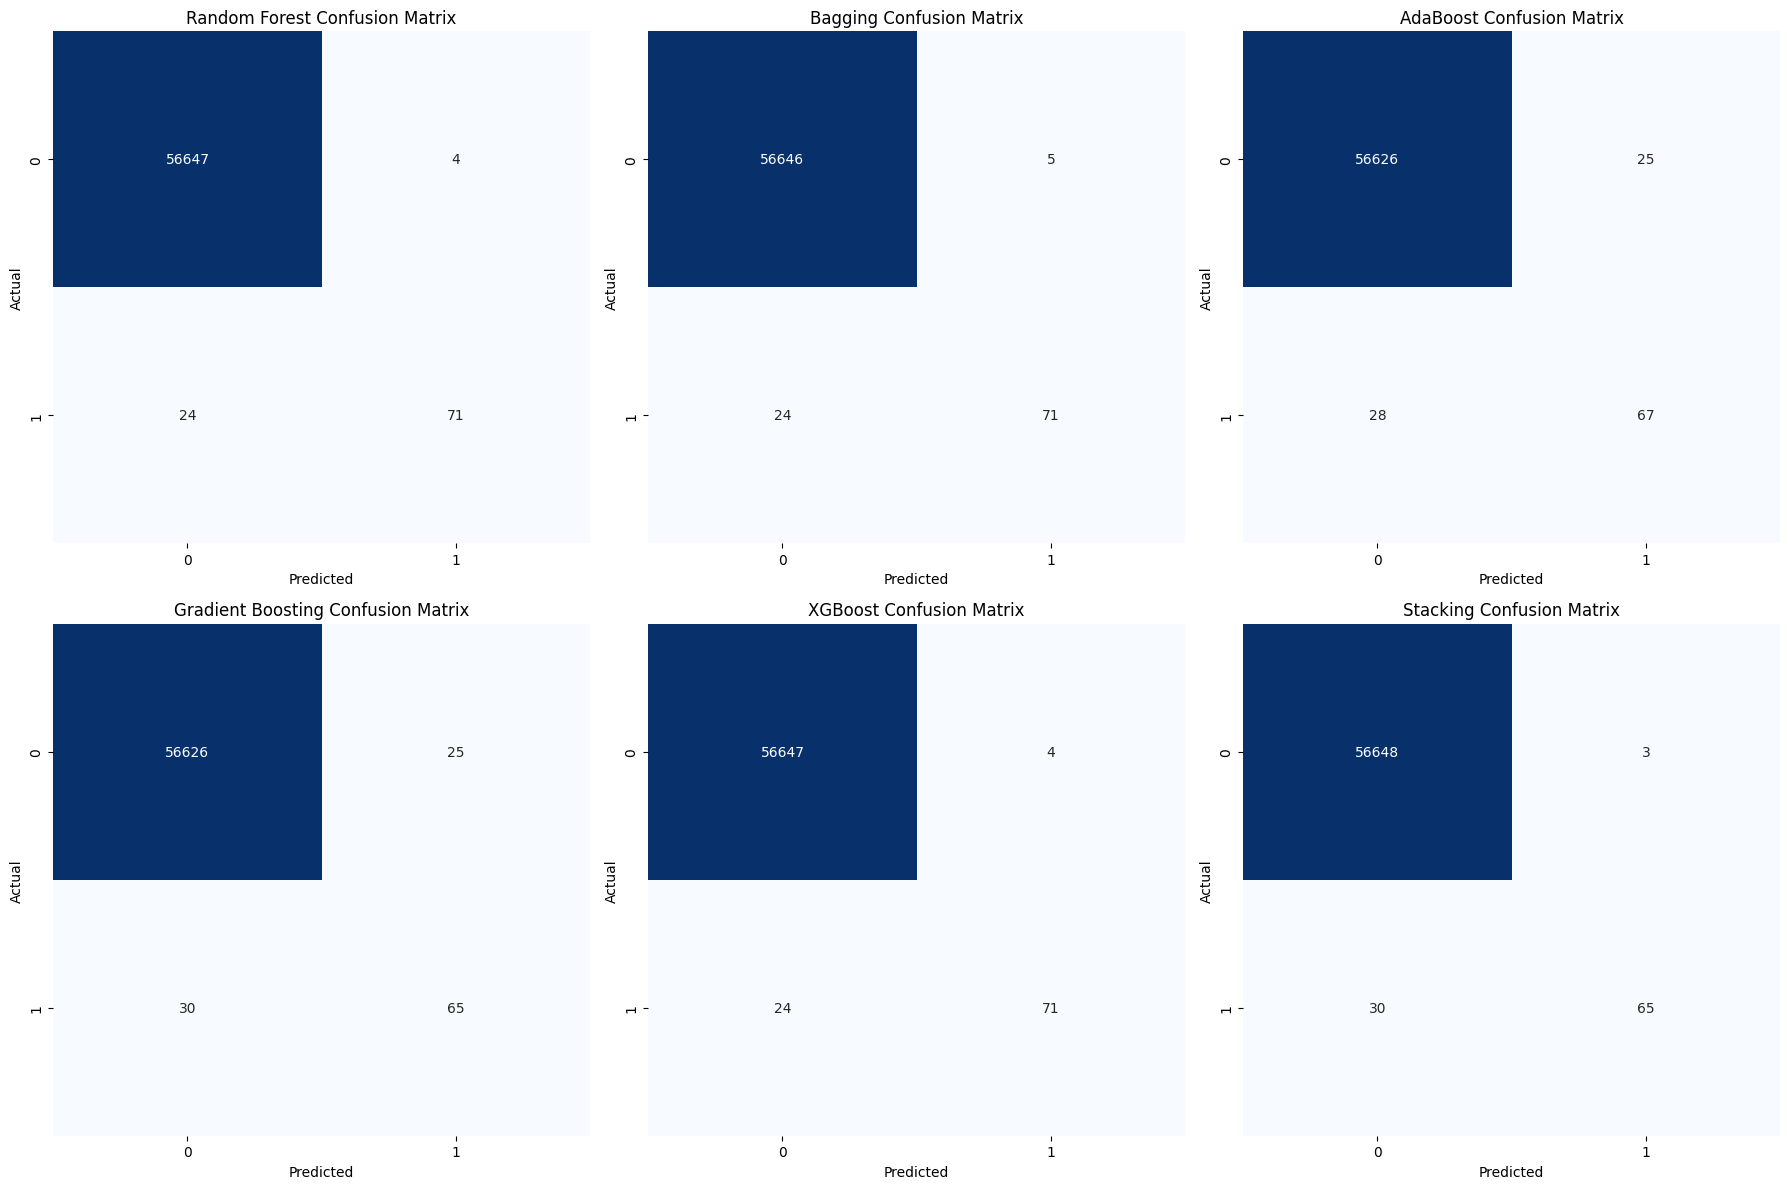

In [51]:
# Dictionary of model predictions
conf_matrices = {
    'Random Forest': confusion_matrix(y_test, rf_pred),
    'Bagging': confusion_matrix(y_test, bag_pred),
    'AdaBoost': confusion_matrix(y_test, ada_pred),
    'Gradient Boosting': confusion_matrix(y_test, gb_pred),
    'XGBoost': confusion_matrix(y_test, xgb_pred),
    'Stacking': confusion_matrix(y_test, stack_pred),
}

# Plot all confusion matrices
plt.figure(figsize=(18, 12))

for i, (name, cm) in enumerate(conf_matrices.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [52]:
from sklearn.metrics import confusion_matrix

# Dictionary of predictions
conf_matrices = {
    'Random Forest': confusion_matrix(y_test, rf_pred),
    'Bagging': confusion_matrix(y_test, bag_pred),
    'AdaBoost': confusion_matrix(y_test, ada_pred),
    'Gradient Boosting': confusion_matrix(y_test, gb_pred),
    'XGBoost': confusion_matrix(y_test, xgb_pred),
    'Stacking': confusion_matrix(y_test, stack_pred),
}

# Print each matrix clearly
for name, cm in conf_matrices.items():
    print(f"\n=== Confusion Matrix: {name} ===")
    print("Actual\\Pred |  Predicted 0 |  Predicted 1")
    print(f"    Class 0  |     {cm[0, 0]:>5}      |     {cm[0, 1]:>5}")
    print(f"    Class 1  |     {cm[1, 0]:>5}      |     {cm[1, 1]:>5}")



=== Confusion Matrix: Random Forest ===
Actual\Pred |  Predicted 0 |  Predicted 1
    Class 0  |     56647      |         4
    Class 1  |        24      |        71

=== Confusion Matrix: Bagging ===
Actual\Pred |  Predicted 0 |  Predicted 1
    Class 0  |     56646      |         5
    Class 1  |        24      |        71

=== Confusion Matrix: AdaBoost ===
Actual\Pred |  Predicted 0 |  Predicted 1
    Class 0  |     56626      |        25
    Class 1  |        28      |        67

=== Confusion Matrix: Gradient Boosting ===
Actual\Pred |  Predicted 0 |  Predicted 1
    Class 0  |     56626      |        25
    Class 1  |        30      |        65

=== Confusion Matrix: XGBoost ===
Actual\Pred |  Predicted 0 |  Predicted 1
    Class 0  |     56647      |         4
    Class 1  |        24      |        71

=== Confusion Matrix: Stacking ===
Actual\Pred |  Predicted 0 |  Predicted 1
    Class 0  |     56648      |         3
    Class 1  |        30      |        65


In [ ]:
# ===========================
# 🔥 SAVE MODEL AND SCALER FOR STREAMLIT
# ===========================
import joblib
import os

print("\n" + "="*50)
print("💾 SAVING MODEL AND SCALER FOR DEPLOYMENT")
print("="*50)

# 1. Save XGBoost Model
try:
    joblib.dump(xgb_clf, "xgboost_fraud_model.pkl")
    file_size = os.path.getsize("xgboost_fraud_model.pkl") / (1024 * 1024)  # MB
    print(f"\n✅ XGBoost Model saved!")
    print(f"   📁 File: xgboost_fraud_model.pkl")
    print(f"   📊 Size: {file_size:.2f} MB")
except Exception as e:
    print(f"\n❌ Error saving model: {e}")

# 2. Save RobustScaler
try:
    joblib.dump(rob_scaler, "robust_scaler.pkl")
    file_size = os.path.getsize("robust_scaler.pkl") / 1024  # KB
    print(f"\n✅ RobustScaler saved!")
    print(f"   📁 File: robust_scaler.pkl")
    print(f"   📊 Size: {file_size:.2f} KB")
except Exception as e:
    print(f"\n❌ Error saving scaler: {e}")

# 3. Verify files
print("\n" + "="*50)
print("🔍 VERIFICATION")
print("="*50)

files_to_check = ["xgboost_fraud_model.pkl", "robust_scaler.pkl"]

for filename in files_to_check:
    if os.path.exists(filename):
        print(f"✅ {filename} - Found")
    else:
        print(f"❌ {filename} - NOT FOUND!")

print("\n" + "="*50)
print("📂 Current Directory:", os.getcwd())
print("="*50)

print("\n🎉 Ready for deployment!")
print("📝 Next steps:")
print("   1. Copy both .pkl files to your Streamlit app folder")
print("   2. Run: streamlit run fraud_detection_app.py")

📂 LOADING DATASET

✅ Dataset loaded successfully!
   📊 Shape: (284807, 31)
   📋 Columns: 31
   📝 Rows: 284,807

🔍 DATA QUALITY CHECK

❓ Missing Values: 0
🔄 Duplicates: 1081
✅ Duplicates removed. New shape: (283726, 31)

📊 CLASS DISTRIBUTION

💳 Genuine Transactions: 283,253 (99.83%)
🚨 Fraudulent Transactions: 473 (0.17%)
⚠️  Imbalance Ratio: 1:598


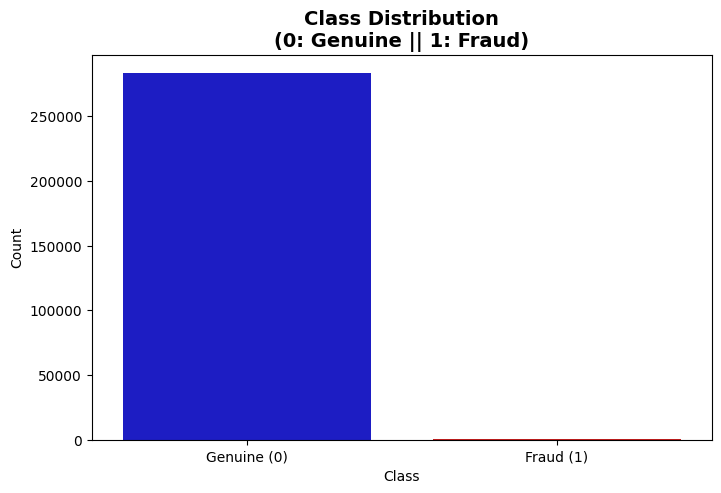


🔧 FEATURE ENGINEERING
✅ Created time-based features:
   - Hour (0-23)
   - Time_sin (cyclical encoding)
   - Time_cos (cyclical encoding)
✅ Dataset shuffled

✂️ SPLITTING DATA

📦 Training Set: 226,980 samples
   Fraud: 378 (0.17%)

📦 Test Set: 56,746 samples
   Fraud: 95 (0.17%)

📏 FEATURE SCALING
✅ Scaled features: Amount, Time
✅ Using: RobustScaler (resistant to outliers)

⚖️ HANDLING CLASS IMBALANCE

📊 Class Weights:
   Class 0 (Genuine): 0.5008
   Class 1 (Fraud):   300.2381
   Weight Ratio: 599.48x

🔄 After SMOTE:
   Training samples: 453,204
   Class 0: 226,602
   Class 1: 226,602
   ✅ Now balanced!

🤖 TRAINING MODELS

🌲 BAGGING METHODS
------------------------------------------------------------

📊 Random Forest
              precision    recall  f1-score   support

     Genuine       1.00      1.00      1.00     56651
       Fraud       0.88      0.80      0.84        95

    accuracy                           1.00     56746
   macro avg       0.94      0.90      0.92     5674

MemoryError: Unable to allocate 55.3 MiB for an array with shape (453204, 32) and data type float32

In [2]:
"""
🎯 CREDIT CARD FRAUD DETECTION - COMPLETE IMPLEMENTATION
========================================================
Dataset: Kaggle - Credit Card Fraud Detection
Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Problem: Binary Classification (Fraud=1, Genuine=0)
Challenge: Highly Imbalanced Dataset (~0.17% fraud)
"""

# ============================================
# 📦 IMPORTS
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, BaggingClassifier,
    AdaBoostClassifier, GradientBoostingClassifier,
    StackingClassifier
)
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import joblib
import os

warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

# ============================================
# 📂 1. DATA LOADING & EXPLORATION
# ============================================
print("="*60)
print("📂 LOADING DATASET")
print("="*60)

df = pd.read_csv('creditcard.csv')

print(f"\n✅ Dataset loaded successfully!")
print(f"   📊 Shape: {df.shape}")
print(f"   📋 Columns: {df.shape[1]}")
print(f"   📝 Rows: {df.shape[0]:,}")

# ============================================
# 🔍 2. DATA QUALITY CHECK
# ============================================
print("\n" + "="*60)
print("🔍 DATA QUALITY CHECK")
print("="*60)

print(f"\n❓ Missing Values: {df.isnull().sum().sum()}")
print(f"🔄 Duplicates: {df.duplicated().sum()}")

# Remove duplicates if any
if df.duplicated().any():
    df = df.drop_duplicates()
    print(f"✅ Duplicates removed. New shape: {df.shape}")

# ============================================
# 📊 3. CLASS DISTRIBUTION ANALYSIS
# ============================================
print("\n" + "="*60)
print("📊 CLASS DISTRIBUTION")
print("="*60)

fraud_count = df['Class'].value_counts()[1]
genuine_count = df['Class'].value_counts()[0]
fraud_pct = (fraud_count / len(df)) * 100
genuine_pct = (genuine_count / len(df)) * 100

print(f"\n💳 Genuine Transactions: {genuine_count:,} ({genuine_pct:.2f}%)")
print(f"🚨 Fraudulent Transactions: {fraud_count:,} ({fraud_pct:.2f}%)")
print(f"⚠️  Imbalance Ratio: 1:{int(genuine_count/fraud_count)}")

# Visualization
plt.figure(figsize=(8, 5))
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distribution\n(0: Genuine || 1: Fraud)', fontsize=14, weight='bold')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Genuine (0)', 'Fraud (1)'])
plt.show()

# ============================================
# 🔧 4. FEATURE ENGINEERING
# ============================================
print("\n" + "="*60)
print("🔧 FEATURE ENGINEERING")
print("="*60)

# Create cyclical time features
df['Hour'] = (df['Time'] / 3600) % 24
df['Time_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Time_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

print("✅ Created time-based features:")
print("   - Hour (0-23)")
print("   - Time_sin (cyclical encoding)")
print("   - Time_cos (cyclical encoding)")

# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print("✅ Dataset shuffled")

# ============================================
# ✂️ 5. TRAIN-TEST SPLIT
# ============================================
print("\n" + "="*60)
print("✂️ SPLITTING DATA")
print("="*60)

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class distribution
)

print(f"\n📦 Training Set: {X_train.shape[0]:,} samples")
print(f"   Fraud: {y_train.sum():,} ({(y_train.sum()/len(y_train)*100):.2f}%)")
print(f"\n📦 Test Set: {X_test.shape[0]:,} samples")
print(f"   Fraud: {y_test.sum():,} ({(y_test.sum()/len(y_test)*100):.2f}%)")

# ============================================
# 📏 6. FEATURE SCALING
# ============================================
print("\n" + "="*60)
print("📏 FEATURE SCALING")
print("="*60)

rob_scaler = RobustScaler()

# Scale Amount
X_train['scaled_amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['scaled_amount'] = rob_scaler.transform(X_test['Amount'].values.reshape(-1, 1))

# Scale Time
X_train['scaled_time'] = rob_scaler.fit_transform(X_train['Time'].values.reshape(-1, 1))
X_test['scaled_time'] = rob_scaler.transform(X_test['Time'].values.reshape(-1, 1))

# Drop original columns
X_train.drop(['Amount', 'Time', 'Hour'], axis=1, inplace=True)
X_test.drop(['Amount', 'Time', 'Hour'], axis=1, inplace=True)

# Reorder columns
for dataset in [X_train, X_test]:
    scaled_amount = dataset.pop('scaled_amount')
    scaled_time = dataset.pop('scaled_time')
    dataset.insert(0, 'scaled_amount', scaled_amount)
    dataset.insert(1, 'scaled_time', scaled_time)

print("✅ Scaled features: Amount, Time")
print(f"✅ Using: RobustScaler (resistant to outliers)")

# ============================================
# ⚖️ 7. HANDLING IMBALANCED DATA
# ============================================
print("\n" + "="*60)
print("⚖️ HANDLING CLASS IMBALANCE")
print("="*60)

# Calculate class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)
class_weight_dict = dict(zip(classes, class_weights))

print(f"\n📊 Class Weights:")
print(f"   Class 0 (Genuine): {class_weight_dict[0]:.4f}")
print(f"   Class 1 (Fraud):   {class_weight_dict[1]:.4f}")
print(f"   Weight Ratio: {class_weight_dict[1]/class_weight_dict[0]:.2f}x")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"\n🔄 After SMOTE:")
print(f"   Training samples: {X_train_resampled.shape[0]:,}")
print(f"   Class 0: {(y_train_resampled == 0).sum():,}")
print(f"   Class 1: {(y_train_resampled == 1).sum():,}")
print(f"   ✅ Now balanced!")

# ============================================
# 🤖 8. MODEL TRAINING & EVALUATION
# ============================================
print("\n" + "="*60)
print("🤖 TRAINING MODELS")
print("="*60)

# Results storage
all_results = {}
all_predictions = {}

# Function to evaluate model
def evaluate_model(name, model, X_train_data, y_train_data, X_test, y_test, duration):
    """Evaluate model and store results"""
    pred = model.predict(X_test)
    prob = model.predict_proba(X_test)[:, 1]
    
    # Store predictions
    all_predictions[name] = {'pred': pred, 'prob': prob}
    
    # Calculate metrics
    all_results[name] = {
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1 Score': f1_score(y_test, pred),
        'ROC AUC': roc_auc_score(y_test, prob),
        'Time (s)': duration
    }
    
    # Print report
    print(f"\n{'='*50}")
    print(f"📊 {name}")
    print('='*50)
    print(classification_report(y_test, pred, target_names=['Genuine', 'Fraud']))
    print(f"🎯 ROC AUC: {roc_auc_score(y_test, prob):.4f}")
    print(f"⏱️  Time: {duration:.2f}s")
    
    return pred, prob

# ============================================
# 🌲 BAGGING METHODS
# ============================================
print("\n🌲 BAGGING METHODS")
print("-" * 60)

# Random Forest
start = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_resampled, y_train_resampled)
rf_pred, rf_prob = evaluate_model('Random Forest', rf, X_train_resampled, 
                                   y_train_resampled, X_test, y_test, time.time()-start)

# Bagging
start = time.time()
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=15),
    n_estimators=70,
    random_state=42,
    n_jobs=-1
)
bag.fit(X_train_resampled, y_train_resampled)
bag_pred, bag_prob = evaluate_model('Bagging', bag, X_train_resampled,
                                     y_train_resampled, X_test, y_test, time.time()-start)

# ============================================
# 🚀 BOOSTING METHODS
# ============================================
print("\n🚀 BOOSTING METHODS")
print("-" * 60)

# AdaBoost
start = time.time()
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_resampled, y_train_resampled)
ada_pred, ada_prob = evaluate_model('AdaBoost', ada, X_train_resampled,
                                     y_train_resampled, X_test, y_test, time.time()-start)

# Gradient Boosting
start = time.time()
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_resampled, y_train_resampled)
gb_pred, gb_prob = evaluate_model('Gradient Boosting', gb, X_train_resampled,
                                   y_train_resampled, X_test, y_test, time.time()-start)

# XGBoost
start = time.time()
xgb_clf = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    random_state=42,
    scale_pos_weight=class_weight_dict[1]/class_weight_dict[0]  # Handle imbalance
)
xgb_clf.fit(X_train_resampled, y_train_resampled)
xgb_pred, xgb_prob = evaluate_model('XGBoost', xgb_clf, X_train_resampled,
                                     y_train_resampled, X_test, y_test, time.time()-start)

# ============================================
# 🔗 STACKING METHOD
# ============================================
print("\n🔗 STACKING METHOD")
print("-" * 60)

start = time.time()
stack = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=500, class_weight='balanced')),
        ('dt', DecisionTreeClassifier(class_weight='balanced')),
        ('rf', RandomForestClassifier(n_estimators=50, class_weight='balanced'))
    ],
    final_estimator=LogisticRegression(class_weight='balanced')
)
stack.fit(X_train_resampled, y_train_resampled)
stack_pred, stack_prob = evaluate_model('Stacking', stack, X_train_resampled,
                                         y_train_resampled, X_test, y_test, time.time()-start)

# ============================================
# 📊 9. RESULTS COMPARISON
# ============================================
print("\n" + "="*60)
print("📊 FINAL COMPARISON")
print("="*60)

# Create comparison DataFrame
comparison_df = pd.DataFrame(all_results).T
comparison_df = comparison_df.round(4)
comparison_df = comparison_df.sort_values('ROC AUC', ascending=False)

print("\n" + comparison_df.to_string())

# Best model
best_model = comparison_df['ROC AUC'].idxmax()
best_score = comparison_df.loc[best_model, 'ROC AUC']
print(f"\n🏆 Best Model: {best_model} (ROC AUC: {best_score:.4f})")

# ============================================
# 📈 10. VISUALIZATIONS
# ============================================
print("\n" + "="*60)
print("📈 GENERATING VISUALIZATIONS")
print("="*60)

# Metrics comparison
fig, ax = plt.subplots(figsize=(14, 7))
comparison_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']].plot(
    kind='bar', ax=ax, colormap='Set2', edgecolor='black', width=0.8
)
plt.title('Model Performance Comparison', fontsize=16, weight='bold', pad=20)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right', fontsize=10)
plt.ylim(0.85, 1.0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (name, preds) in enumerate(all_predictions.items()):
    cm = confusion_matrix(y_test, preds['pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], cbar=False)
    axes[idx].set_title(f'{name}', fontsize=12, weight='bold')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curves
plt.figure(figsize=(10, 8))
for name, preds in all_predictions.items():
    fpr, tpr, _ = roc_curve(y_test, preds['prob'])
    auc = roc_auc_score(y_test, preds['prob'])
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, weight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================
# 💾 11. SAVE MODELS FOR DEPLOYMENT
# ============================================
print("\n" + "="*60)
print("💾 SAVING MODELS")
print("="*60)

# Save best model (XGBoost)
try:
    joblib.dump(xgb_clf, "xgboost_fraud_model.pkl")
    model_size = os.path.getsize("xgboost_fraud_model.pkl") / (1024 * 1024)
    print(f"\n✅ XGBoost Model saved!")
    print(f"   📁 File: xgboost_fraud_model.pkl")
    print(f"   📊 Size: {model_size:.2f} MB")
except Exception as e:
    print(f"❌ Error saving model: {e}")

# Save scaler
try:
    joblib.dump(rob_scaler, "robust_scaler.pkl")
    scaler_size = os.path.getsize("robust_scaler.pkl") / 1024
    print(f"\n✅ Scaler saved!")
    print(f"   📁 File: robust_scaler.pkl")
    print(f"   📊 Size: {scaler_size:.2f} KB")
except Exception as e:
    print(f"❌ Error saving scaler: {e}")

# Verification
print("\n" + "="*60)
print("✅ DEPLOYMENT READY")
print("="*60)
print("\n📝 Files created:")
print("   1. xgboost_fraud_model.pkl")
print("   2. robust_scaler.pkl")
print("\n🚀 Next steps:")
print("   - Copy files to Streamlit app folder")
print("   - Run: streamlit run app.py")
print("="*60)